- Chris Sunny Thaliyath 
- Assignment 1 
-   Computer Vision 
- 9051pai2023


 
 
 
 ## Q1. Write a Python program that takes any one of the RGB image from the given database as input, converts it to
a quantized image by using k-Means image quantization at varying ‘k’ values i.e. 1, 2, 4, 8, 16. 
Also, calculates
the Mean Squared Error (MSE).
Your program should include the following steps:

• Read an RGB image as input.(DONE)

*used Opencv*


• Implement a function to perform k-Means image quantization.

*Color quantization is critical for displaying images with many colors on devices that can only display a limited number of colors, usually due to memory limitations, and enables efficient compression of certain types of images.Color quantization, 2023.*

• Convert the input RGB image to a quantized image using the k-Means algorithm by varying ‘k’.

• Calculate the Mean Squared Error (MSE) between the original RGB image and quantized image.

• Analyze and discuss the effectiveness and limitations of k-Means image quantization in the context ofthe calculated MSE.

In [8]:
!pip3 install scikit-image
!pip3 install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import cv2

from cv2 import cvtColor , COLOR_BGR2RGB , TERM_CRITERIA_MAX_ITER , KMEANS_RANDOM_CENTERS ,TERM_CRITERIA_EPS ,kmeans
import numpy as np
from skimage import measure
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from numpy import unique , float32 , uint8
import argparse
import cv2

#from enum import unique
#Read an RGB image as input.(DONE)

def read_image(path_to_image):
    image=cv2.imread(path_to_image)
    return image

def display_image(title,image):
    #cv2.imshow("input_image",image)
    plt.imshow(image)
    plt.title(title)
    plt.show()




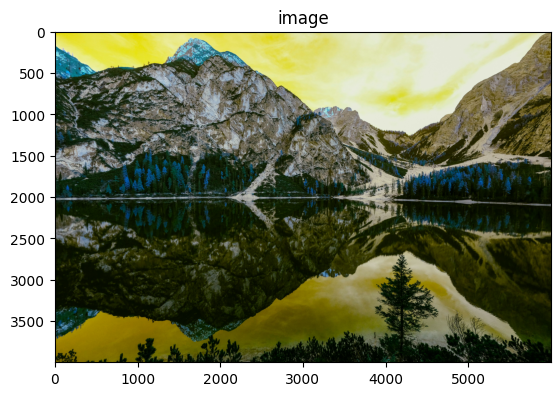

In [10]:


def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are

def diff_remove_bg(img0, img, img1):
    d1 = diff(img0, img)
    d2 = diff(img, img1)
    return cv2.bitwise_and(d1, d2)

 

#Implement a function to perform k-Means image quantization.

def k_means_image_quantization(img):
    # Convert it from BGR to RGB
    img_RGB = cvtColor(img, COLOR_BGR2RGB)
 
    # Reshape image to an Mx3 array
    img_data = img_RGB.reshape(-1, 3)
    
    # Find the number of unique RGB values
    print(len(unique(img_data, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')
    
    # Specify the algorithm's termination criteria
    criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)
    
    # Run the k-means clustering algorithm on the pixel values
    compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)
    
    # Apply the RGB values of the cluster centers to all pixel labels
    colours = centers[labels].reshape(-1, 3)
    
    # Find the number of unique RGB values
    print(len(unique(colours, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')
    
    # Reshape array to the original image shape
    img_colours = colours.reshape(img_RGB.shape)
    
    # Display the quantized image
    #imshow(img_colours.astype(uint8))
    display_image("kmeans_output",img_colours.astype(uint8))
    #show()
    return img_colours

#Convert the input RGB image to a quantized image using the k-Means algorithm by varying ‘k’.
def vary_k_in_k_means(image):
    pass
    



image=read_image("Assignment_1_database/Q1/RGB image 2.jpg")
display_image("image",image)
k_means_image=k_means_image_quantization(image)



In [ ]:
#Analyze and discuss the effectiveness and limitations of k-Means image quantization in the context ofthe calculated MSE.
m = mse(image, k_means_image)
#s = ssim(image, k_means_image)
#s = measure.compare_ssim(image, k_means_image)
s = measure.metrics.structural_similarity(image, k_means_image)
#s=measure.
print ("mse: %s, ssim: %s" % (m, 0))

AttributeError: No skimage.measure attribute metrics

## Q2. Write a code to find the connected components present in an image as shown in the given example. Utilize the provided image in the database ‘Connected component’ to identify the components, emphasizing accuracy.

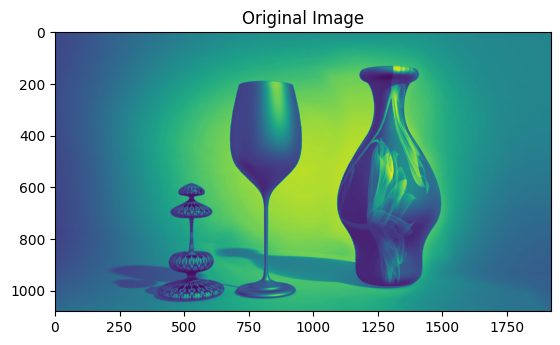

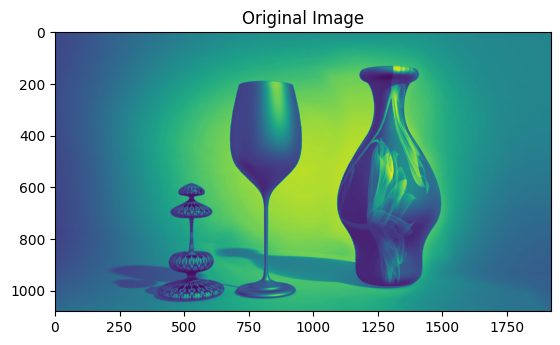

In [ ]:
import cv2

import cv2
import numpy as np

# Load the image (replace 'connected_components.jpg' with your image file)
image = cv2.imread("Assignment_1_database/Q2/Connected component.jpg", 0)

# Binarize the image
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, 8, cv2.CV_32S)

# Create an output image to draw the labeled components
output = np.zeros_like(binary, dtype=np.uint8)

# Iterate through the connected components
for label in range(1, num_labels):
    # Get the bounding box coordinates for the current component
    x, y, w, h, area = stats[label]

    # Draw a rectangle around the connected component
    cv2.rectangle(output, (x, y), (x + w, y + h), 255, 2)

    # Add the label number to the center of the component
    text = str(label)
    cv2.putText(output, text, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)

# Display the original image and the output with labeled components
#cv2.imshow('Original Image', image)
display_image('Original Image', image)
#cv2.imshow('Connected Components', output)
display_image('Original Image', image)

def find_connected_components(image):
  """
  Finds connected components in a binary image.

  Args:
      image: The binary image as a NumPy array.

  Returns:
      labeled_image: The image with connected components labeled.
      num_components: The number of connected components.
  """
  # Apply connected component labeling using OpenCV (adapt function call based on version)
  ret, labeled_


## Q3. From the attached database of standard test images, select the gray scale ‘lena_gray_512.tif’ image ofdimension pixels. Perform the following operations:

(a) Reduce the image size by down sampling to 256x256, name this image as ‘reduce_lena_256.tif’.

(b) Compare the reduced image ‘reduced_lena_256.tif’ with the given image in the database ‘lena_gray_256.tif’
by finding the PSNR values between them. Also plot the image showing MSE difference for the same.

(c) Now again resize the computed image ‘reduced_lena_256.tif’ to original dimension pixel using these methods:

• Nearest Neighbour Interpolation

• Bilinear Interpolation

• Bicubic Interpolation

In [ ]:
import cv2
import numpy as np

def down_sample(image, new_size=(256, 256)):
  """
  Downsamples a grayscale image using averaging.

  Args:
      image: The original grayscale image as a NumPy array.
      new_size: The desired output image size (default: (256, 256)).

  Returns:
      down_sampled_image: The downsampled grayscale image.
  """
  h, w = image.shape

  # Ensure new size is within original image dimensions
  new_h, new_w = min(new_size[0], h), min(new_size[1], w)

  down_sampled_image = np.zeros((new_h, new_w), dtype=image.dtype)

  # Average pixel values in blocks for downsampling
  for y in range(0, h, 2):
    for x in range(0, w, 2):
      block = image[y:y+2, x:x+2]  # Extract 2x2 block
      down_sampled_image[y // 2, x // 2] = np.mean(block)  # Average values

  return down_sampled_image

def calculate_psnr(image1, image2):
  """
  Calculates the Peak Signal-to-Noise Ratio (PSNR) between two images.

  Args:
      image1: The first image as a NumPy array.
      image2: The second image as a NumPy array.

  Returns:
      psnr: The PSNR value in dB.
  """
  mse = np.mean(np.square(image1 - image2))
  if mse == 0:  # Avoid division by zero
    return float('inf')
  max_intensity = 255.0  # Assuming 8-bit images
  psnr = 10 * np.log10(max_intensity**2 / mse)
  return psnr

def plot_mse_difference(image1, image2, title="MSE Difference"):
  """
  Calculates and plots the pixel-wise Mean Squared Error (MSE) difference between two images.

  Args:
      image1: The first image as a NumPy array.
      image2: The second image as a NumPy array.
      title: The title for the plot (default: "MSE Difference").
  """
  mse_diff = np.square(image1 - image2)
  display_image(title, mse_diff.astype(np.uint8))  # Convert to uint8 for visualization
  
def up_sample(image, scale_factor=2, method="bilinear"):
  """
  Upsamples a grayscale image using various interpolation methods.

  Args:
      image: The original grayscale image as a NumPy array.
      scale_factor: The upsampling factor (default: 2).
      method: The interpolation method (default: "bilinear", options: "nearest", "bilinear", "bicubic").

  Returns:
      up_sampled_image: The upsampled grayscale image.
  """
  h, w = image.shape
  new_h, new_w = int(h * scale_factor), int(w * scale_factor)

  if method == "nearest":
    up_sampled_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
  elif method == "bilinear":
    up_sampled_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
  elif method == "bicubic":
    up_sampled_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
  else:
    raise ValueError(f"Invalid interpolation method: {method}")

  return up_


Q4. Develop codes in python to obtain the filtered imaged from the noisy image given to you as input ‘Noisy
image’ in the database. Show the steps involved to be applied for filtering and explain why? 

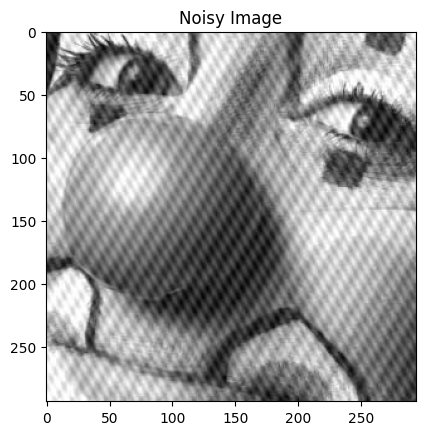

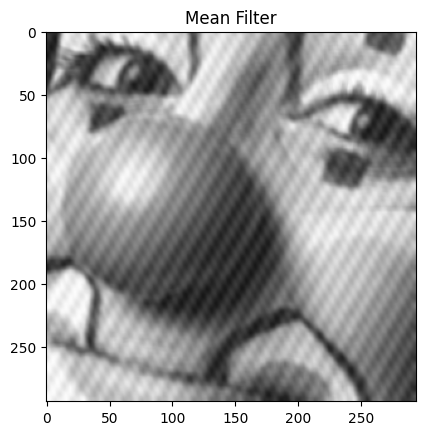

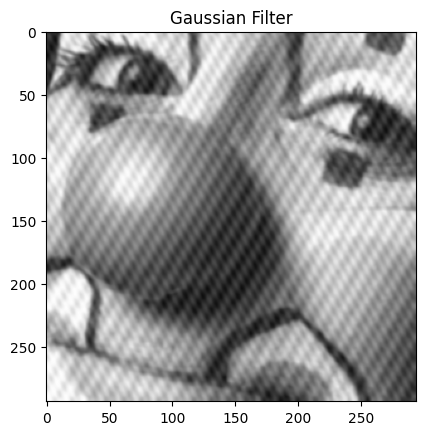

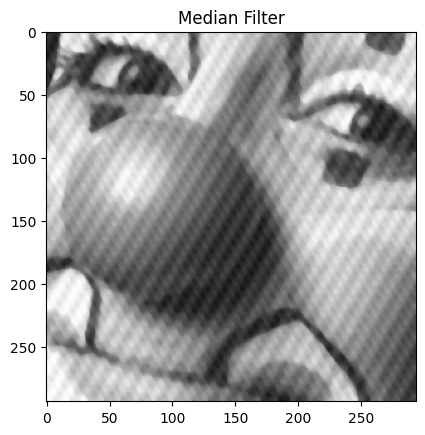

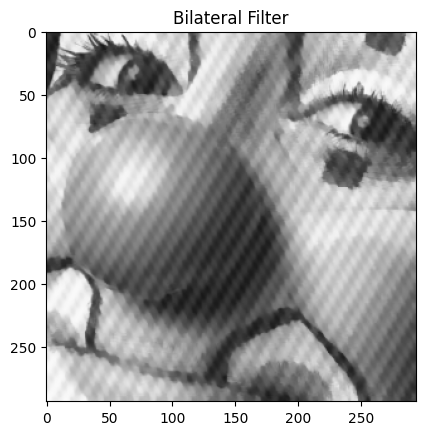

In [ ]:
import cv2
import numpy as np


import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


def question_function():
    #images=load_images_from_folder("Assignment_1_database/Q4/Noisy image.jpg")
    images = [cv2.imread("Assignment_1_database/Q4/Noisy image.jpg")]
    for image in images:

        noisy_image = image
        # Apply different filtering techniques
        filtered_mean = cv2.blur(noisy_image, (5, 5))
        filtered_gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)
        filtered_median = cv2.medianBlur(noisy_image, 5)
        filtered_bilateral = cv2.bilateralFilter(noisy_image, 9, 75, 75)

        # Display the images
        #cv2.imshow('Noisy Image', noisy_image)
        display_image('Noisy Image', image)
        #cv2.imshow('Mean Filter', filtered_mean)
        display_image('Mean Filter', filtered_mean)
        #cv2.imshow('Gaussian Filter', filtered_gaussian)
        display_image('Gaussian Filter', filtered_gaussian)
        #cv2.imshow('Median Filter', filtered_median)
        display_image('Median Filter', filtered_median)
        #cv2.imshow('Bilateral Filter', filtered_bilateral)
        display_image('Bilateral Filter', filtered_bilateral)

    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

question_function()

## Q5. Take any one image from the given database and compute##:

• First order derivative along ‘x’

• First order derivative along ‘y’

• Gradient image magnitude and followed by thresholding to output edge map.

• Edge map computed using second order derivative

• Edge map using LoG and Canny edge detector

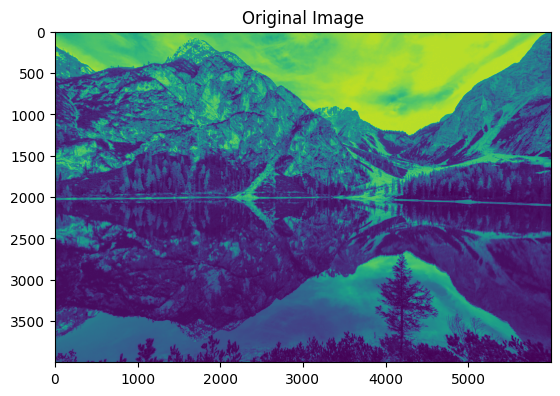

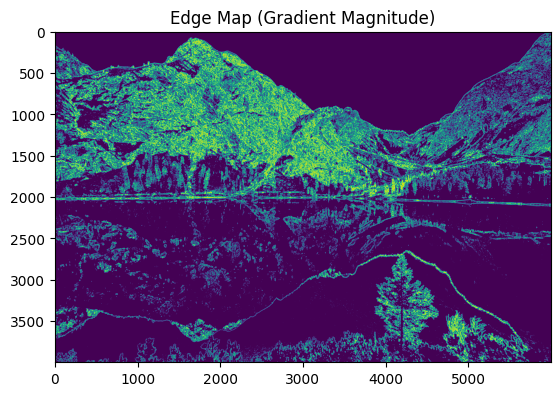

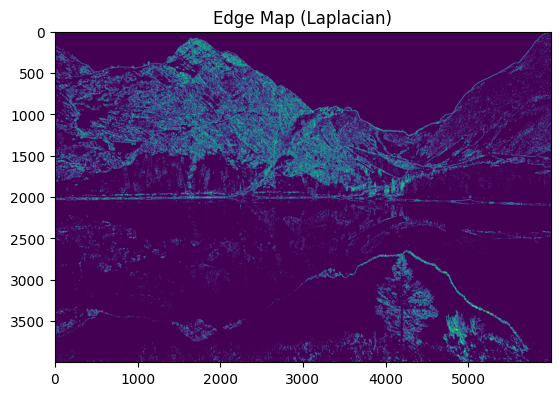

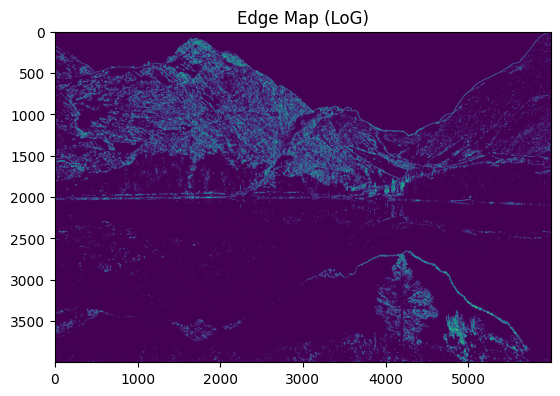

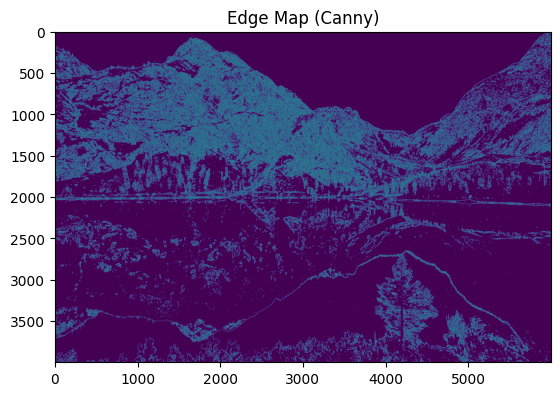

In [ ]:
import cv2
import numpy as np

# Load the image (replace 'image.jpg' with your image file)
image = cv2.imread("Assignment_1_database/Q1/RGB image 2.jpg", 0)  # Read in grayscale mode

# Compute first-order derivatives
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and threshold for edge map
magnitude = np.sqrt(sobelx**2 + sobely**2)
edge_map_magnitude = np.uint8(magnitude > 100)  # Adjust the threshold value as needed

# Compute second-order derivative for edge map
laplacian = cv2.Laplacian(image, cv2.CV_64F)
edge_map_laplacian = np.uint8(np.abs(laplacian) > 50)  # Adjust the threshold value as needed

# Compute LoG and Canny edge maps
blurred = cv2.GaussianBlur(image, (3, 3), 0)
log = cv2.Laplacian(blurred, cv2.CV_64F)
edge_map_log = np.uint8(np.abs(log) > 30)  # Adjust the threshold value as needed

edge_map_canny = cv2.Canny(image, 100, 200)  # Adjust the threshold values as needed

# Display the results
display_image('Original Image', image)
display_image('Edge Map (Gradient Magnitude)', edge_map_magnitude)
display_image('Edge Map (Laplacian)', edge_map_laplacian)
display_image('Edge Map (LoG)', edge_map_log)
display_image('Edge Map (Canny)', edge_map_canny)



## Q6. Apply the bit plane slicing of the following image size 3x3, for an 8-bit image “0” is encoded in 00000000 and “255” is encoded in 11111111

167 133 111

144 140 135

159 154 148

Implement the bit-plane slicing process using a programming language of your choice (e.g., Python with
OpenCV).

 Provide the code snippet and explain each step in the implementation.

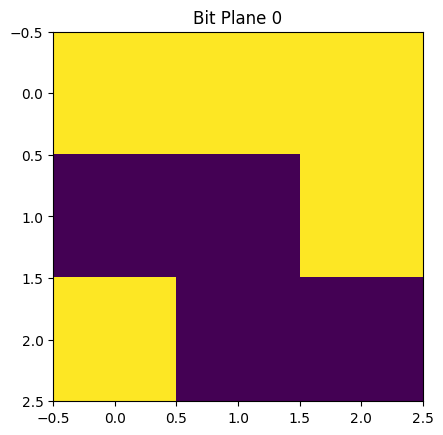

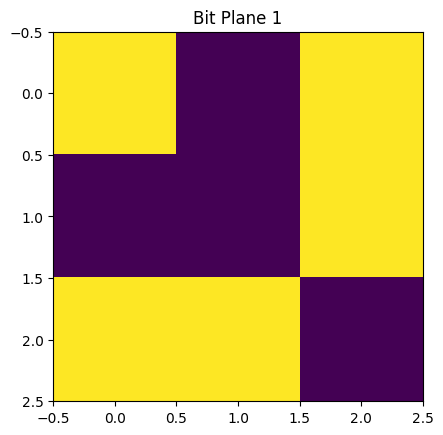

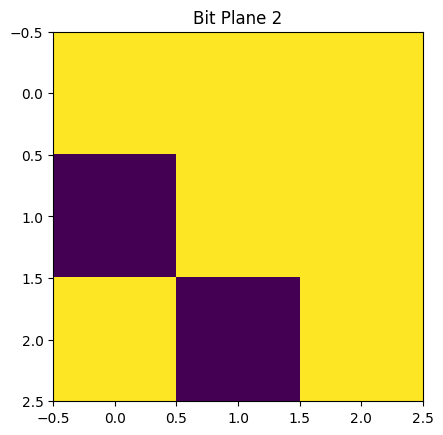

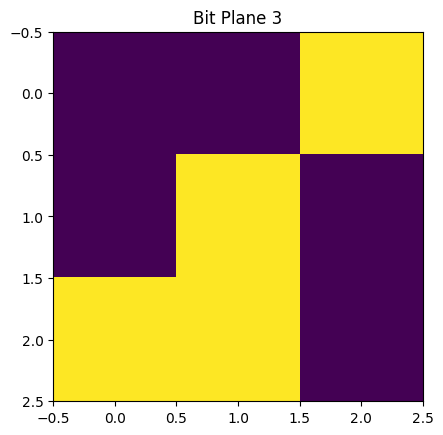

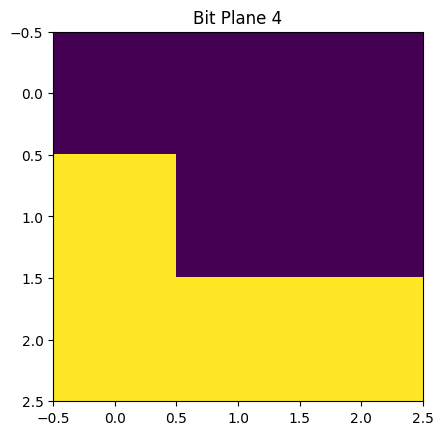

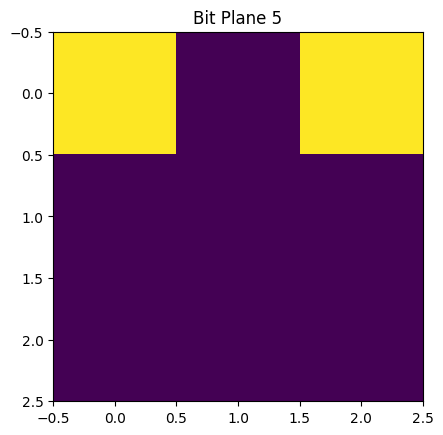

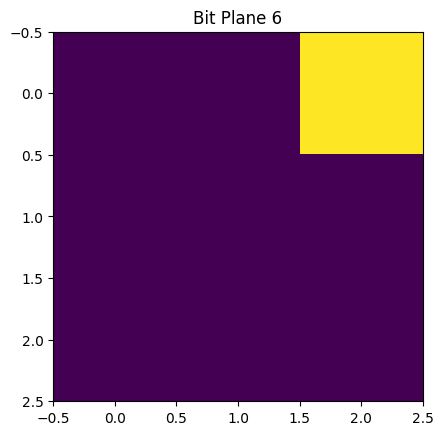

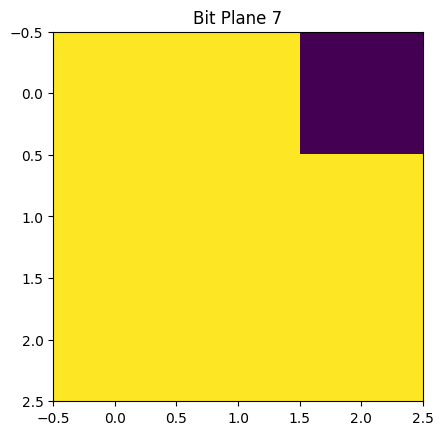

In [ ]:
import cv2
import numpy as np

# Input image
img = np.array([[167, 133, 111],
                [144, 140, 135],
                [159, 154, 148]], dtype=np.uint8)

# Function to extract a single bit plane
def get_bit_plane(img, bit_pos):
    # Create a mask to extract the desired bit plane
    mask = 1 << bit_pos
    
    # Apply the mask to extract the bit plane
    bit_plane = np.bitwise_and(img, mask)
    
    # Shift the extracted bit plane to the right-most position
    bit_plane = np.right_shift(bit_plane, bit_pos)
    
    return bit_plane

# Extract and display each bit plane
for bit_pos in range(8):
    bit_plane = get_bit_plane(img, bit_pos)
    display_image(f"Bit Plane {bit_pos}", bit_plane)
    #cv2.waitKey(0)

cv2.destroyAllWindows()

REFERENCES
- https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
- https://pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/
- https://gist.github.com/gonzalo123/df3e43477f8627ecd1494d138eae03ae
- https://stackoverflow.com/questions/55178229/importerror-cannot-import-name-structural-similarity-error
- 